In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
currdir = os.getcwd()

In [3]:
os.listdir(currdir)

['.ipynb_checkpoints',
 'aclImdb',
 'aclImdb.zip',
 'CaliforniPricePrediction.ipynb',
 'Car Price Prediction.ipynb',
 'Car_Purchasing_Data.csv',
 'cifar-10-python.tar.gz',
 'CIFAR10.ipynb',
 'Codalab',
 'datasets',
 'glove.6B.zip',
 'gloveDir',
 'Hackerearth',
 'jena_climate_2009_2016.csv',
 'jena_climate_2009_2016.csv.zip',
 'Kaggle',
 'MNIST Dataset classification.ipynb',
 'pre_trained_glove_model.h5',
 'TemperatureForecasting.ipynb',
 'Untitled.ipynb']

In [4]:
from keras.datasets import cifar10

Using TensorFlow backend.


In [5]:
(x_train,y_train) , (x_test , y_test) = cifar10.load_data()

In [6]:
x_train.shape

(50000, 32, 32, 3)

In [7]:
y_train.shape

(50000, 1)

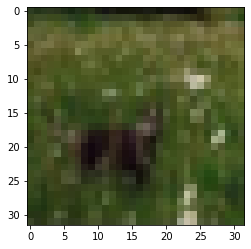

In [8]:
from random import randint
idx = randint(0,len(x_train))
plt.imshow(x_train[idx])

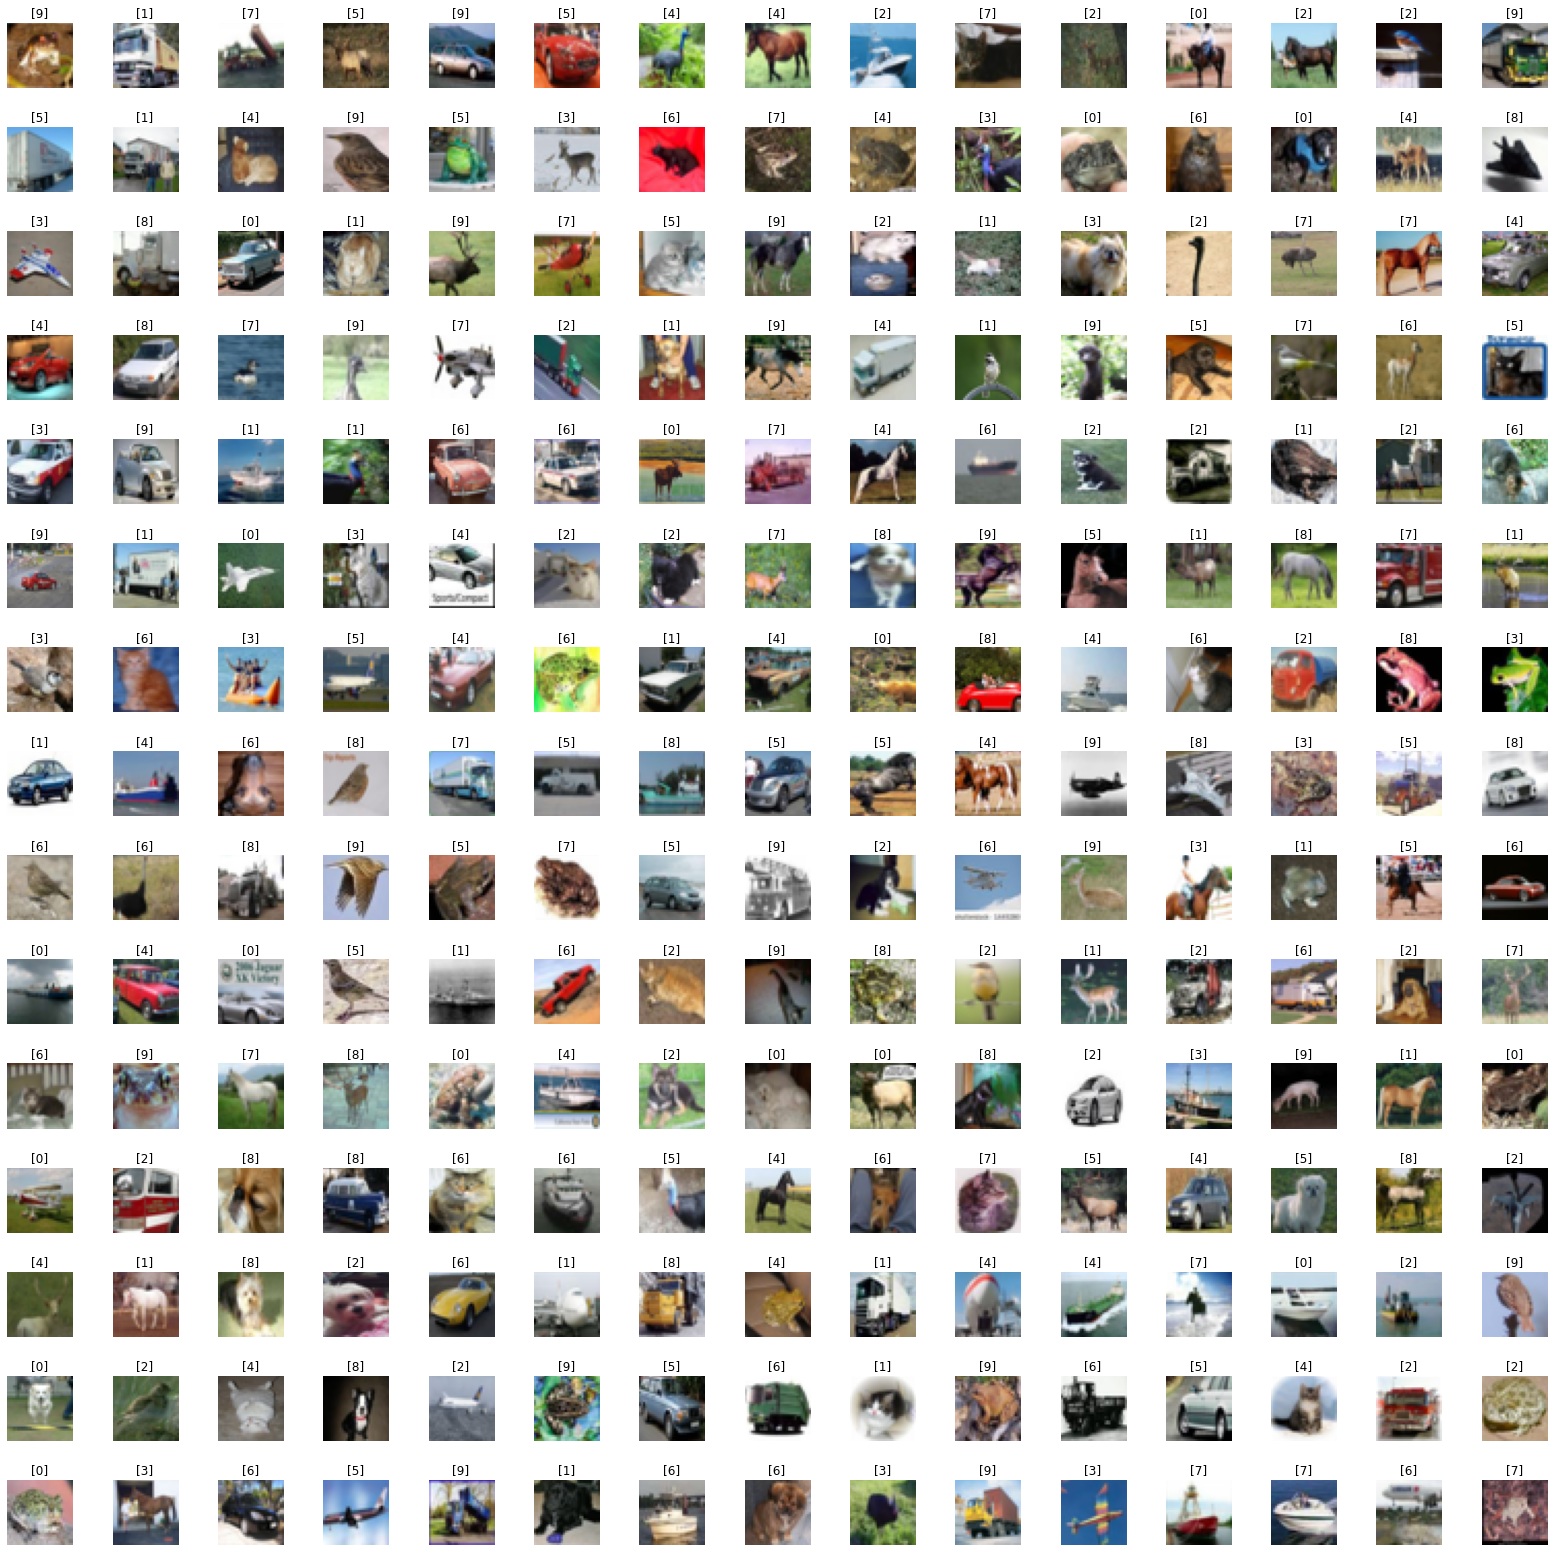

In [9]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

L_grid , W_grid = 15 , 15
fig , axes = plt.subplots(L_grid , W_grid , figsize = (28,28))
axes = axes.ravel()

n_training = len(x_train)

for i in np.arange(0,L_grid*W_grid):
    index = randint(0,n_training)
    axes[i].imshow(x_train[i])
    axes[i].axis('off')
    axes[i].set_title(y_train[index])
plt.subplots_adjust(hspace = 0.6)

In [10]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [11]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [12]:
numberOfClasses = 10
from keras.utils import to_categorical
y_train = to_categorical(y_train ,numberOfClasses)

In [13]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [14]:
y_test = to_categorical(y_test,numberOfClasses)

In [15]:
x_train /= 255
x_test /= 255

In [16]:
input_shape = x_train.shape[1:]

In [17]:
input_shape

(32, 32, 3)

In [18]:
from keras.models import Sequential
from keras.layers import Flatten,Conv2D,MaxPooling2D,AveragePooling2D,Dense , Dropout
from keras.callbacks import TensorBoard

In [20]:
model = Sequential()
model.add(Conv2D(filters = 32 , kernel_size= (3,3) , activation='relu' , input_shape = input_shape))
model.add(Conv2D(filters = 32 , kernel_size= (3,3) , activation='relu' ))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(filters = 64 , kernel_size= (3,3) , activation='relu' ))
model.add(Conv2D(filters = 64 , kernel_size= (3,3) , activation='relu' ))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(units = 256 , activation = 'relu'))
model.add(Dense(units = 256 , activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 10,activation = 'softmax'))

In [21]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)             

In [22]:
model.compile(loss = 'categorical_crossentropy' , optimizer = 'adam' , metrics = ['acc'])

In [23]:
history = model.fit(x_train,y_train,batch_size=64,epochs = 32,shuffle = True)

Epoch 1/32
50000/50000 [==============================] - 12s 235us/step - loss: 1.5544 - acc: 0.4271
Epoch 2/32
50000/50000 [==============================] - 10s 202us/step - loss: 1.0829 - acc: 0.6159
Epoch 3/32
50000/50000 [==============================] - 10s 203us/step - loss: 0.8542 - acc: 0.70050s - loss: 0.8549 
Epoch 4/32
50000/50000 [==============================] - 10s 206us/step - loss: 0.7201 - acc: 0.7503
Epoch 5/32
50000/50000 [==============================] - 10s 204us/step - loss: 0.6191 - acc: 0.7826
Epoch 6/32
50000/50000 [==============================] - 10s 207us/step - loss: 0.5290 - acc: 0.81360s - loss: 0.5290 - acc: 0.813
Epoch 7/32
50000/50000 [==============================] - 10s 206us/step - loss: 0.4557 - acc: 0.8395
Epoch 8/32
50000/50000 [==============================] - 10s 209us/step - loss: 0.3886 - acc: 0.8641
Epoch 9/32
50000/50000 [==============================] - 11s 210us/step - loss: 0.3235 - acc: 0.8849
Epoch 10/32
50000/50000 [=========

In [27]:
test_loss , test_acc = model.evaluate(x_test,y_test)

10000/10000 [==============================] - 3s 296us/step


In [29]:
print(f"Loss on test data {test_loss}")
print(f"Accuracy on test data {test_acc}")

Loss on test data 1.9142396654605864
Accuracy on test data 0.7365999817848206


In [32]:
predicted_classes = model.predict_classes(x_test)

In [33]:
predicted_classes

array([3, 8, 1, ..., 5, 1, 7], dtype=int64)

In [34]:
y_test_check = y_test.argmax(1)

In [35]:
y_test_check

array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

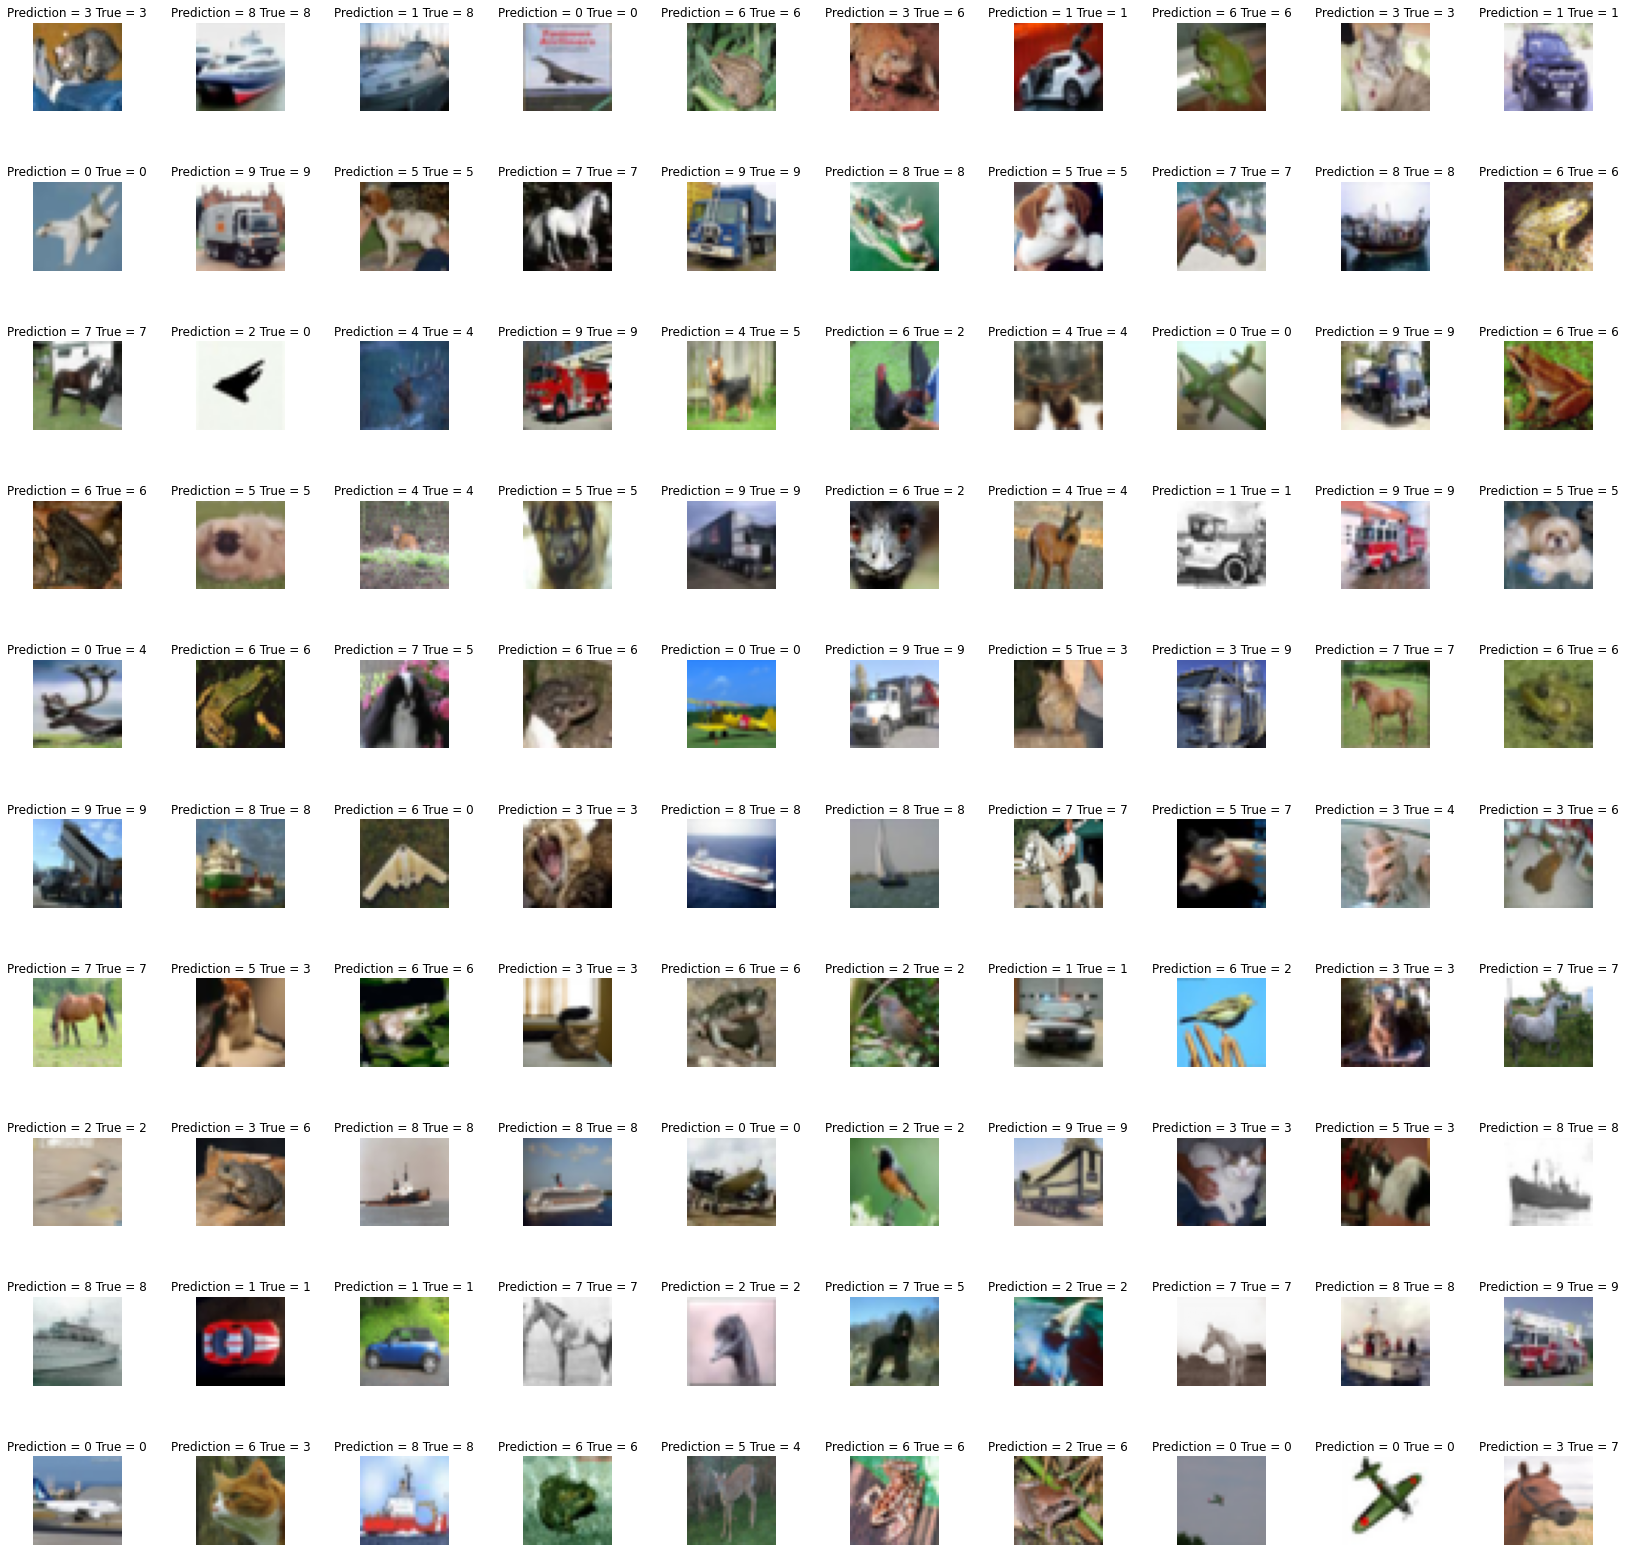

In [38]:
L , W = 10 , 10
fig , axes = plt.subplots(L,W,figsize = (28,28))
axes = axes.ravel()

for i in range(0,L*W):
    axes[i].imshow(x_test[i])
    axes[i].set_title(f"Prediction = {predicted_classes[i]} True = {y_test_check[i]}")
    axes[i].axis('off')
plt.subplots_adjust(hspace = 0.8 , wspace = 0.8)

In [39]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test_check,predicted_classes)

In [40]:
cm

array([[786,  17,  48,  23,  15,   6,  13,  12,  50,  30],
       [ 15, 879,   5,   2,   3,   5,   7,   2,  28,  54],
       [ 55,   8, 629,  78,  55,  72,  53,  19,  14,  17],
       [ 24,  11,  69, 572,  32, 172,  48,  35,  16,  21],
       [ 24,   4,  65,  90, 658,  49,  50,  42,  12,   6],
       [ 10,   6,  35, 192,  32, 651,  14,  43,   9,   8],
       [  7,   1,  48,  83,  26,  26, 787,   6,   7,   9],
       [ 16,   7,  27,  57,  48,  71,  11, 744,   4,  15],
       [ 77,  24,  17,  16,   4,   6,   9,   3, 818,  26],
       [ 27,  70,   2,  21,   3,   9,   3,   2,  21, 842]], dtype=int64)

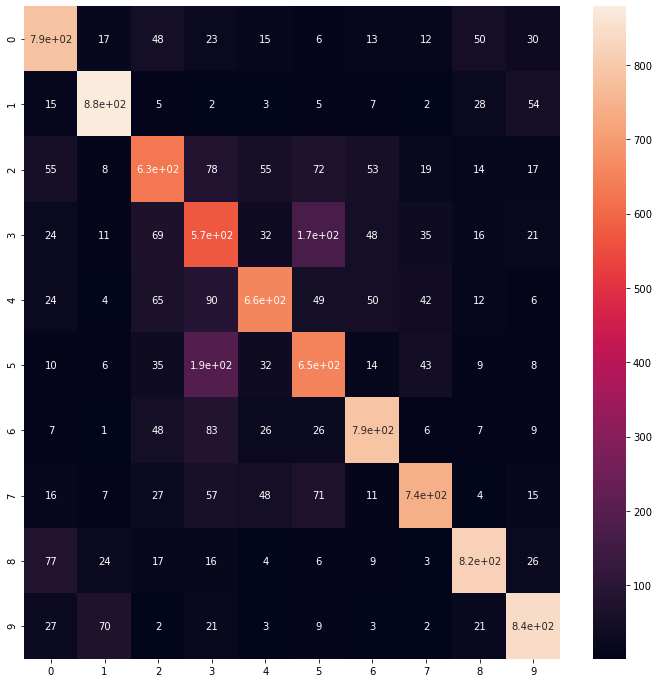

In [70]:
plt.figure(figsize = (12,12))
sns.heatmap(cm , annot=True)

In [71]:
model.save('cifar10_model_1.h5')